<a href="https://colab.research.google.com/github/Divya0701/MlModels/blob/main/FeathureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np

In [14]:
import pandas as pd

In [92]:
import matplotlib as plt

In [93]:
import seaborn as sb

In [3]:
df=pd.read_csv("cereals.csv")

In [4]:
m,n=df.shape

In [ ]:
X="1"*m
X=[int(x) for x in list(X)]
X=np.stack(X,-1)
print(X)

In [ ]:
df.insert(0,"new",X)

In [63]:
print(df)

    new  calories  protein  fat  sodium  fiber     rating
0     1        70        4    1     130   10.0  68.402973
1     1       120        3    5      15    2.0  33.983679
2     1        70        4    1     260    9.0  59.425505
3     1        50        4    0     140   14.0  93.704912
4     1       110        2    2     180    1.5  29.509541
..  ...       ...      ...  ...     ...    ...        ...
70    1       110        2    1     250    0.0  39.106174
71    1       110        1    1     140    0.0  27.753301
72    1       100        3    1     230    3.0  49.787445
73    1       100        3    1     200    3.0  51.592193
74    1       110        2    1     200    1.0  36.187559

[75 rows x 7 columns]


In [28]:
X_Train=df.iloc[:int(0.7*m),:6]

In [30]:
Y_Train=df.iloc[:int(0.7*m),6]

In [33]:
X_Test=df.iloc[int(0.7*m):,:6]

In [69]:
Y_Test=df.iloc[int(0.7*m):,6]

In [55]:
Selecting=[]

In [36]:
B=np.dot(np.linalg.inv(np.dot(X_Train.T,X_Train)), np.dot(X_Train.T,Y_Train))

In [56]:
for i in range(1,n):
  p=np.corrcoef(df.iloc[:,i].values, df.iloc[:,6].values)
  Selecting.append(p[0,1])
  

In [58]:
print(Selecting)

[-0.6943772894559791, 0.4681907009172461, -0.39337641883274627, -0.38805033587810916, 0.6035025610302239]


In [60]:
Y_Pred=np.dot(X_Test,B)

In [66]:
Y_mean=np.mean(Y_Test)

In [67]:
SSR=sum((Y_mean-Y_Pred)**2)

In [68]:
print(SSR)

2610.247964848363


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


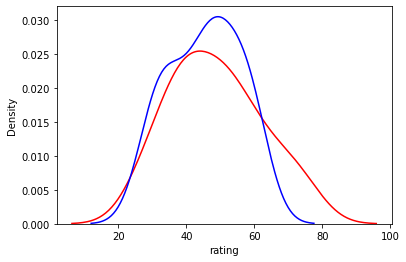

In [94]:
ax1=sb.distplot(Y_Test,hist=False,color="r",label="Actual Values")
sb.distplot(Y_Pred,hist=False,color="b",label="Fitted values",ax=ax1)

In [79]:
df1=df.iloc[:,[0,1,3,4,5,6]]

In [ ]:
print(df1)

In [81]:
X_Train1=df1.iloc[:int(0.7*m),:5]

In [82]:
Y_Train1=df1.iloc[:int(0.7*m),5]

In [83]:
X_Test1=df1.iloc[int(0.7*m):,:5]

In [84]:
Y_Test1=df1.iloc[int(0.7*m):,5]

In [85]:
B1=np.dot(np.linalg.inv(np.dot(X_Train1.T,X_Train1)), np.dot(X_Train1.T,Y_Train1))

In [88]:
Y_Pred1=np.dot(X_Test1,B1)

In [89]:
Y_mean1=np.mean(Y_Test1)

In [90]:
SSR1=sum((Y_mean1-Y_Pred1)**2)

In [91]:
print(SSR1)

2215.239641432931


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


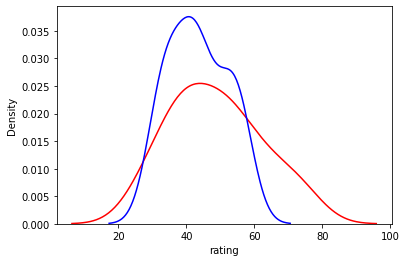

In [95]:
ax1=sb.distplot(Y_Test1,hist=False,color="r",label="Actual Values")
sb.distplot(Y_Pred1,hist=False,color="b",label="Fitted values",ax=ax1)